In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv("C:\\Users\\md kaif\\Downloads\\Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
## Segregating X And Y we Will Take 2 Features At One Time

In [7]:
x=df[["Annual Income (k$)","Spending Score (1-100)"]]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


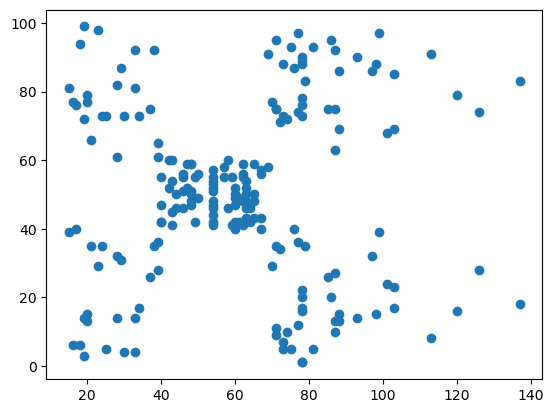

In [8]:
plt.scatter(x["Annual Income (k$)"],x["Spending Score (1-100)"])

In [10]:
dbscan=DBSCAN(eps=5,min_samples=5)

In [11]:
clusters=dbscan.fit_predict(x)

In [12]:
clusters

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, -1,  2, -1,  4,  3,  2,  3,  2, -1,  2,  3,  4,
        3,  2,  3,  2,  3,  4, -1,  4,  3,  4, -1,  2, -1,  4, -1,  4, -1,
        2, -1,  4,  3,  2,  3,  2, -1,  4, -1,  4, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

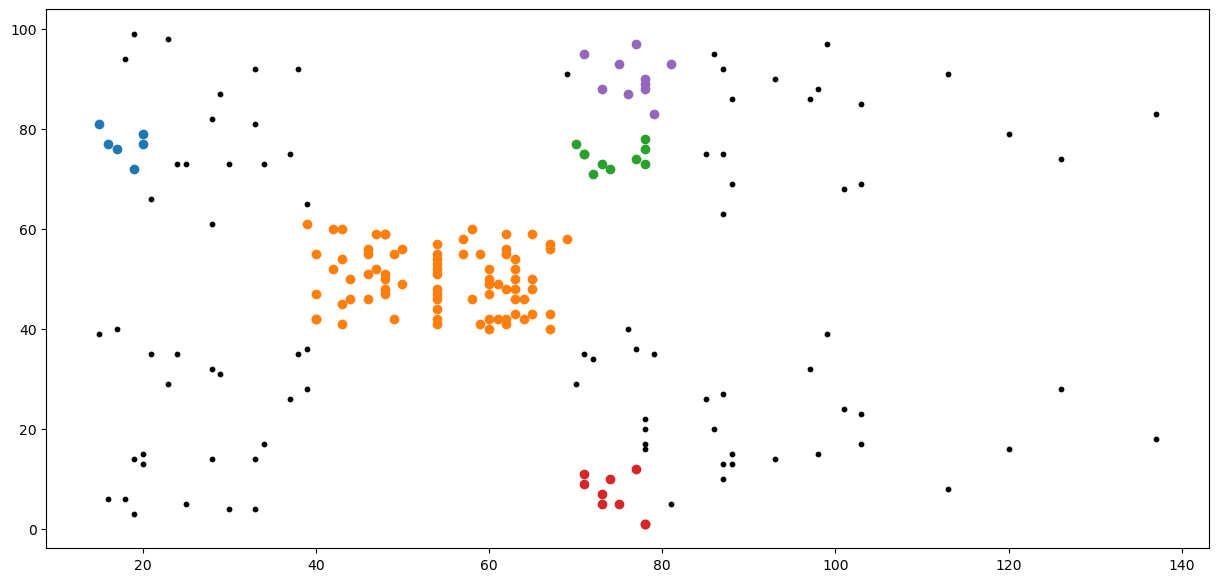

In [17]:
plt.figure(figsize=(15,7))
plt.scatter(x[clusters==0]["Annual Income (k$)"],x[clusters==0]["Spending Score (1-100)"])
plt.scatter(x[clusters==-1]["Annual Income (k$)"],x[clusters==-1]["Spending Score (1-100)"],s=10,c="black")
plt.scatter(x[clusters==1]["Annual Income (k$)"],x[clusters==1]["Spending Score (1-100)"])
plt.scatter(x[clusters==2]["Annual Income (k$)"],x[clusters==2]["Spending Score (1-100)"])
plt.scatter(x[clusters==3]["Annual Income (k$)"],x[clusters==3]["Spending Score (1-100)"])
plt.scatter(x[clusters==4]["Annual Income (k$)"],x[clusters==4]["Spending Score (1-100)"])
plt.scatter(x[clusters==5]["Annual Income (k$)"],x[clusters==5]["Spending Score (1-100)"])
plt.scatter(x[clusters==6]["Annual Income (k$)"],x[clusters==6]["Spending Score (1-100)"])

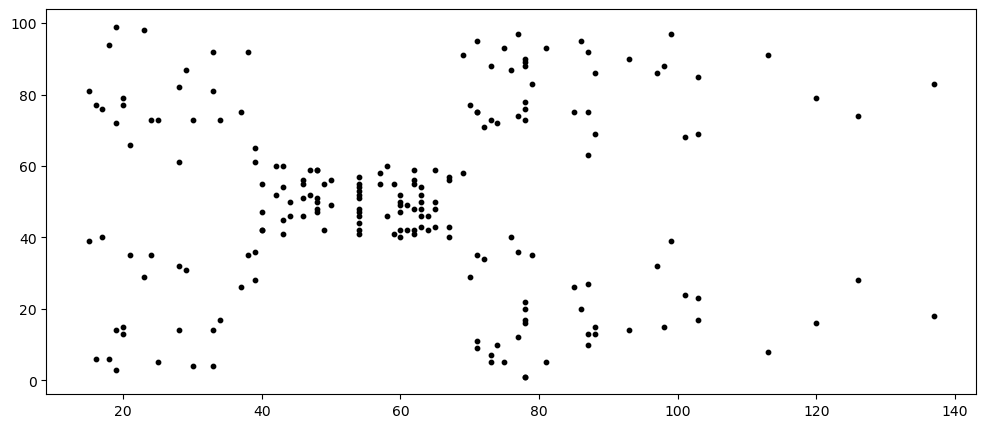

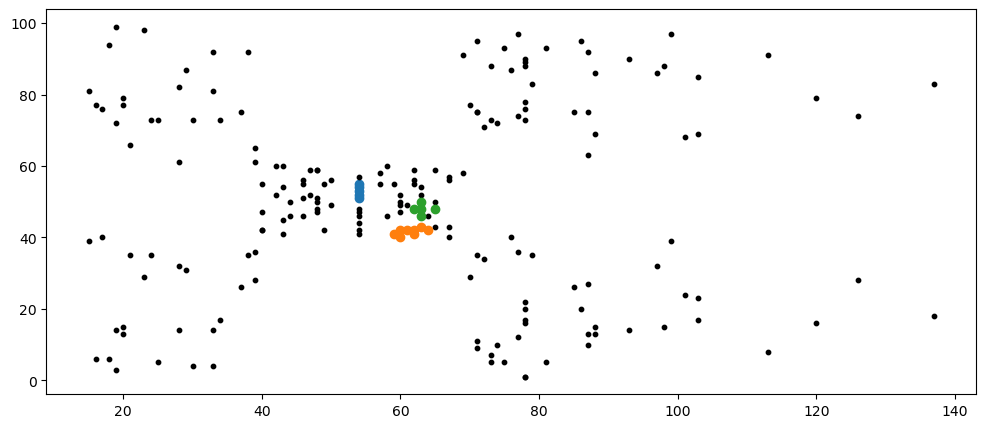

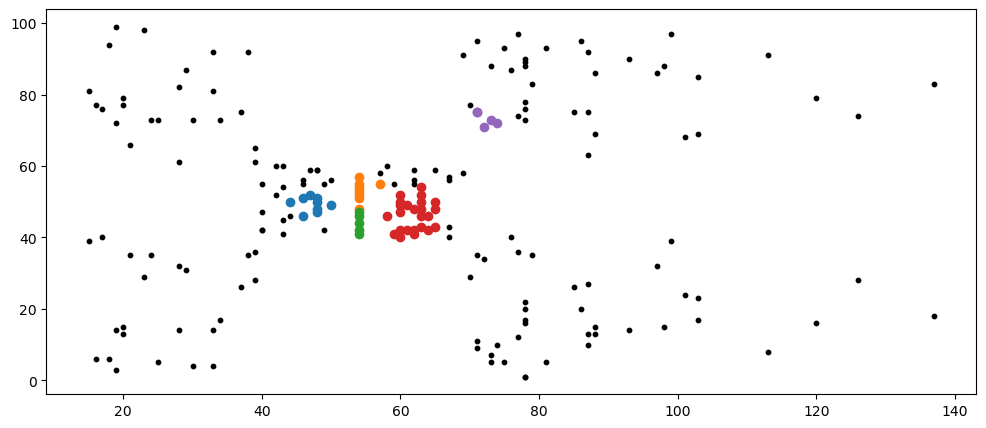

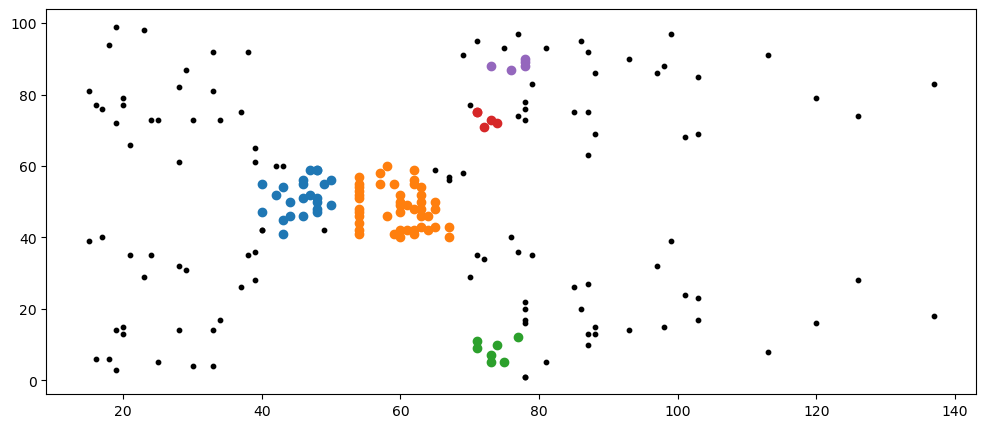

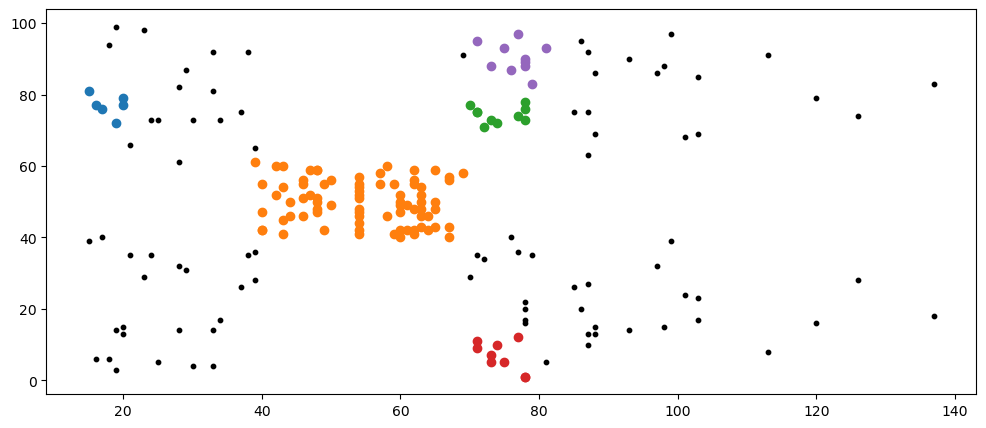

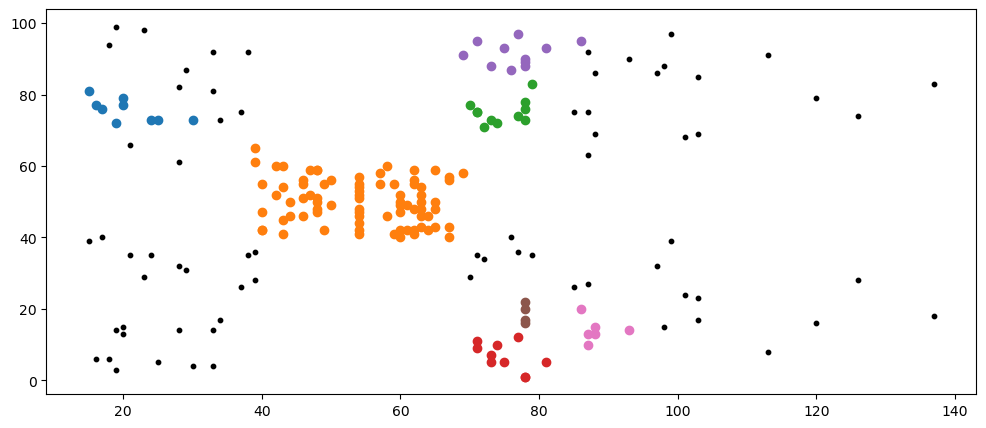

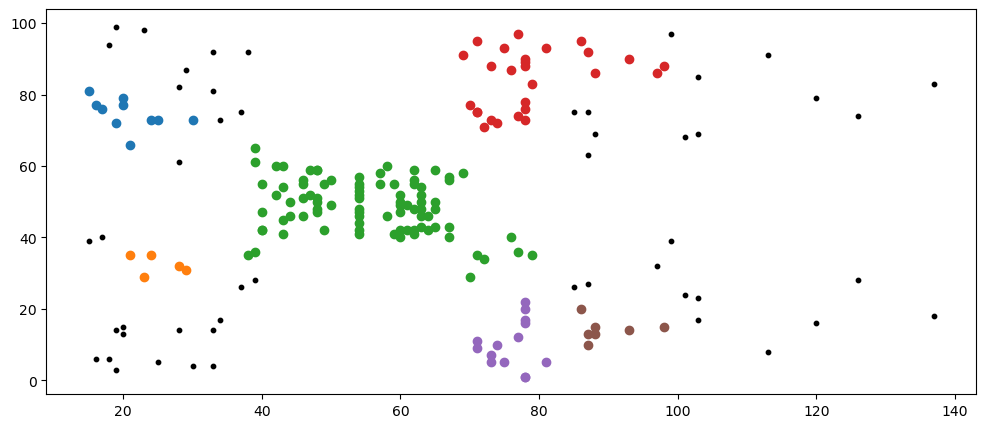

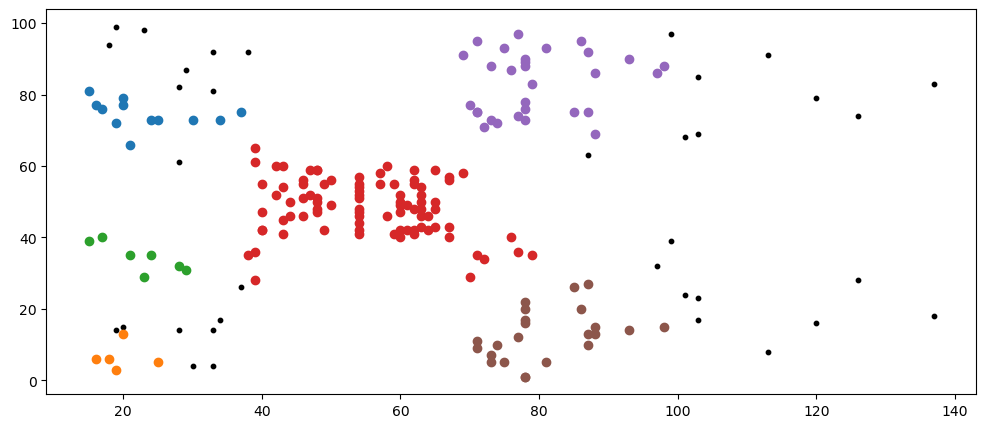

In [19]:
# if we change min number of epsilon
l=[1,2,3,4,5,6,7,8]
for i in l:
    dbscan=DBSCAN(eps=i,min_samples=5)
    clusters=dbscan.fit_predict(x)
    plt.figure(figsize=(12,5))
    plt.scatter(x[clusters==0]["Annual Income (k$)"],x[clusters==0]["Spending Score (1-100)"])
    plt.scatter(x[clusters==-1]["Annual Income (k$)"],x[clusters==-1]["Spending Score (1-100)"],s=10,c="black")
    plt.scatter(x[clusters==1]["Annual Income (k$)"],x[clusters==1]["Spending Score (1-100)"])
    plt.scatter(x[clusters==2]["Annual Income (k$)"],x[clusters==2]["Spending Score (1-100)"])
    plt.scatter(x[clusters==3]["Annual Income (k$)"],x[clusters==3]["Spending Score (1-100)"])
    plt.scatter(x[clusters==4]["Annual Income (k$)"],x[clusters==4]["Spending Score (1-100)"])
    plt.scatter(x[clusters==5]["Annual Income (k$)"],x[clusters==5]["Spending Score (1-100)"])
    plt.scatter(x[clusters==6]["Annual Income (k$)"],x[clusters==6]["Spending Score (1-100)"])


In [31]:
from sklearn.neighbors import NearestNeighbors
neigh= NearestNeighbors(n_neighbors=3)
nbrs=neigh.fit(x)
distance,indices=nbrs.kneighbors(x)

In [32]:
print("distance",distance)

distance [[ 0.          2.23606798  7.21110255]
 [ 0.          4.12310563  5.38516481]
 [ 0.          2.          4.24264069]
 [ 0.          1.41421356  4.        ]
 [ 0.          2.23606798  6.40312424]
 [ 0.          1.41421356  3.16227766]
 [ 0.          2.          3.16227766]
 [ 0.          5.09901951  6.40312424]
 [ 0.          3.16227766  4.24264069]
 [ 0.          4.47213595  5.09901951]
 [ 0.          1.41421356  1.41421356]
 [ 0.          4.12310563  5.09901951]
 [ 0.          1.41421356  2.        ]
 [ 0.          2.          3.16227766]
 [ 0.          1.41421356  2.        ]
 [ 0.          2.          4.24264069]
 [ 0.          3.          6.32455532]
 [ 0.          6.32455532  7.61577311]
 [ 0.          5.83095189  6.08276253]
 [ 0.          4.12310563  6.40312424]
 [ 0.          3.          5.        ]
 [ 0.          1.          5.09901951]
 [ 0.          5.09901951  6.32455532]
 [ 0.          1.          5.        ]
 [ 0.          5.          6.70820393]
 [ 0.          5

In [33]:
print("index",indices)

index [[  0   4  16]
 [  1   3  15]
 [  2   6   8]
 [  3   5  13]
 [  4   0  16]
 [  5   3  13]
 [  6   2   8]
 [  7  11  19]
 [  8   6   2]
 [  9   5  13]
 [ 10  14  12]
 [ 11  19   7]
 [ 12  10  14]
 [ 13  15   5]
 [ 14  10  12]
 [ 15  13   5]
 [ 16  20  18]
 [ 17   9  21]
 [ 18  26  20]
 [ 19  11   7]
 [ 20  16  26]
 [ 21  23   9]
 [ 22  30   8]
 [ 23  21  31]
 [ 24  34  36]
 [ 25  29  35]
 [ 26  28  20]
 [ 27  17  43]
 [ 28  26  18]
 [ 29  25  33]
 [ 30  32  22]
 [ 31  37  23]
 [ 32  30  22]
 [ 33  41  29]
 [ 34  36  24]
 [ 35  25  39]
 [ 36  34  24]
 [ 37  39  31]
 [ 38  44  40]
 [ 39  37  35]
 [ 40  42  44]
 [ 41  33  29]
 [ 42  40  48]
 [ 43  51  45]
 [ 44  38  40]
 [ 45  43  51]
 [ 46  52  50]
 [ 47  54  57]
 [ 49  48  55]
 [ 49  48  55]
 [ 50  52  56]
 [ 51  53  43]
 [ 52  50  61]
 [ 53  51  63]
 [ 54  57  59]
 [ 55  49  48]
 [ 56  58  50]
 [ 57  54  59]
 [ 58  62  64]
 [ 59  57  69]
 [ 60  61  63]
 [ 61  60  70]
 [ 62  64  58]
 [ 63  68  65]
 [ 64  66  62]
 [ 68  65  63]
 [ 6

In [34]:
## Sorting Distances
distances=np.sort(distance,axis=0)

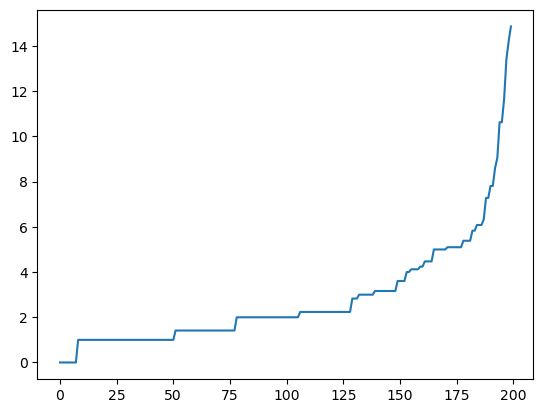

In [35]:
distances=distances[:,1]
distances
plt.plot(distances)

In [49]:
## We HAve Got Our Optimal Value Of Epsilon
dbscan=DBSCAN(eps=5,min_samples=3)

In [50]:
clusters=dbscan.fit_predict(x)

In [51]:
clusters

array([-1,  1,  0,  1, -1,  1,  0, -1,  0,  1,  2, -1,  2,  1,  2,  1,  3,
       -1, -1, -1,  3,  4, -1,  4,  5, -1,  3, -1,  3, -1, -1,  4, -1, -1,
        5, -1,  5,  4, -1,  4, -1, -1, -1,  6, -1,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  7, -1,  8, -1,  7,  9,  8,  9,  8, -1,  8,  9,  7,
        9,  8,  9,  8,  9,  7, 10,  7,  9,  7, 10,  8,  9,  7,  9,  7,  9,
        8,  9,  7,  9,  8,  9,  8, 10,  7,  9,  7, -1, -1, -1, -1, -1, -1,
       11, -1, 11, -1, 11, -1, 11, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

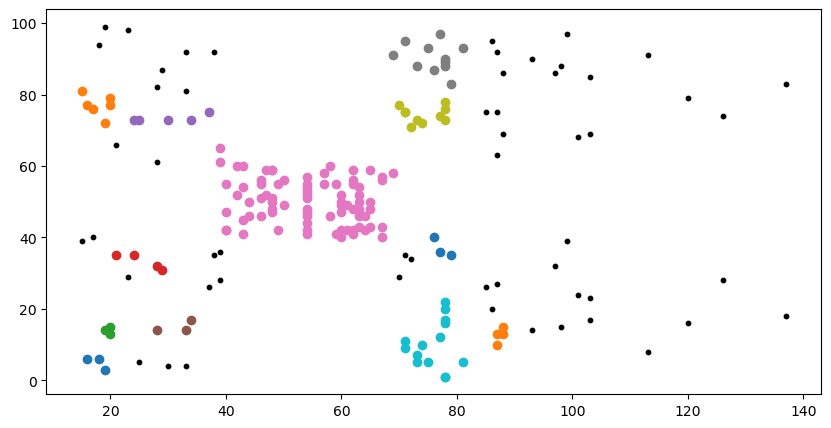

In [52]:
plt.figure(figsize=(10,5))
plt.scatter(x[clusters==0]["Annual Income (k$)"],x[clusters==0]["Spending Score (1-100)"])
plt.scatter(x[clusters==-1]["Annual Income (k$)"],x[clusters==-1]["Spending Score (1-100)"],s=10,c="black")
plt.scatter(x[clusters==1]["Annual Income (k$)"],x[clusters==1]["Spending Score (1-100)"])
plt.scatter(x[clusters==2]["Annual Income (k$)"],x[clusters==2]["Spending Score (1-100)"])
plt.scatter(x[clusters==3]["Annual Income (k$)"],x[clusters==3]["Spending Score (1-100)"])
plt.scatter(x[clusters==4]["Annual Income (k$)"],x[clusters==4]["Spending Score (1-100)"])
plt.scatter(x[clusters==5]["Annual Income (k$)"],x[clusters==5]["Spending Score (1-100)"])
plt.scatter(x[clusters==6]["Annual Income (k$)"],x[clusters==6]["Spending Score (1-100)"])
plt.scatter(x[clusters==7]["Annual Income (k$)"],x[clusters==7]["Spending Score (1-100)"])
plt.scatter(x[clusters==8]["Annual Income (k$)"],x[clusters==8]["Spending Score (1-100)"])
plt.scatter(x[clusters==9]["Annual Income (k$)"],x[clusters==9]["Spending Score (1-100)"])
plt.scatter(x[clusters==10]["Annual Income (k$)"],x[clusters==10]["Spending Score (1-100)"])
plt.scatter(x[clusters==11]["Annual Income (k$)"],x[clusters==11]["Spending Score (1-100)"])

AttributeError: module 'numpy' has no attribute 'irange'